In [ ]:
# Import Library yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Load Dataset

Contoh Data Awal:
5 baris pertama:


,class,cap-shape,cap-surface,cap-color,bruises,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,close,narrow,black,enlarging,equal,smooth,smooth,white,white,white,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,close,broad,black,enlarging,club,smooth,smooth,white,white,white,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,close,broad,brown,enlarging,club,smooth,smooth,white,white,white,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,white,black,scattered,urban
4,edible,convex,smooth,gray,no,crowded,broad,black,tapering,equal,smooth,smooth,white,white,white,brown,abundant,grasses


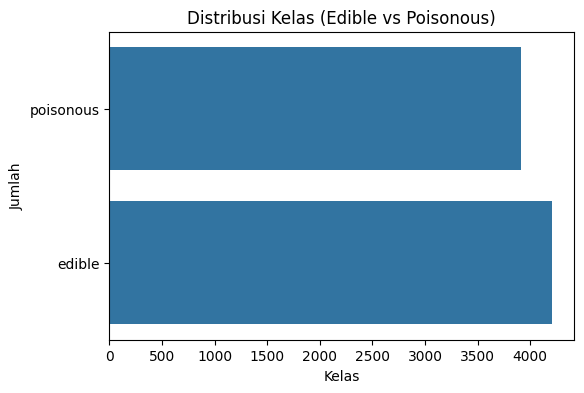

In [ ]:
# Load Dataset dari URL
url = "https://raw.githubusercontent.com/dataset-machine-learning/mushroom/refs/heads/main/mushroom.csv"
data = pd.read_csv(url, sep=';')
print("Contoh Data Awal:")
data

# Visualisasi beberapa baris awal
print("5 baris pertama:")
display(data.head())

# Visualisasi distribusi target class
plt.figure(figsize=(6,4))
sns.countplot(data['class'])
plt.title("Distribusi Kelas (Edible vs Poisonous)")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.show()

TAHAP EDA / PREPROCESSING -- DATVIS

Jumlah data kosong tiap kolom:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
Jumlah data sebelum menghapus duplikat: 8124
Jumlah data setelah menghapus duplikat: 6554


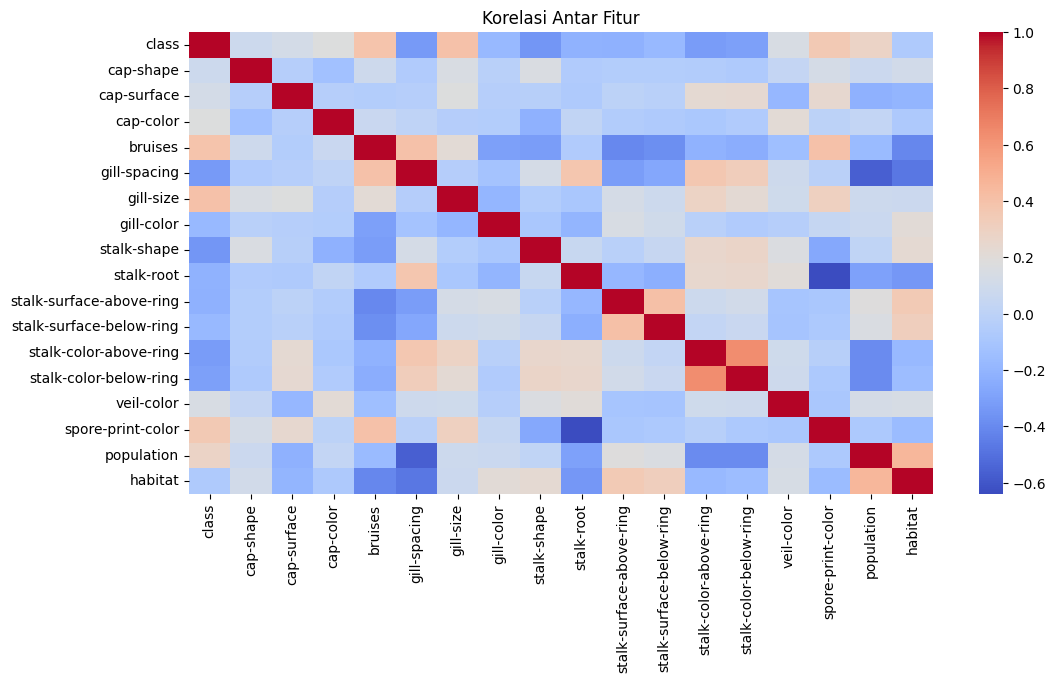

In [ ]:
# MELIHAT ADA DATA KOSONG ATAU TIDAK
print("Jumlah data kosong tiap kolom:")
print(data.isnull().sum())

# MERUBAH HURUF MENJADI ANGKA
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

# SEBELUM DI HAPUS YANG DUPLIKAT
print(f"Jumlah data sebelum menghapus duplikat: {data.shape[0]}")

# MENGHAPUS DUPLIKAT
data.drop_duplicates(inplace=True)

# SETELAH DI HAPUS
print(f"Jumlah data setelah menghapus duplikat: {data.shape[0]}")

# HAPUS KOLOM YANG TERLALU BERPENGARUH
data.drop(columns=['gill-spacing', 'gill-size', 'stalk-surface-above-ring', 'stalk-surface-below-ring','spore-print-color'])

# MEMISAHKAN FITUR DAN TARGET (MENJADIKAN CLASS SEBAGAI TARGET)
X = data.drop(columns=['class'])
y = data['class']

data

# Visualisasi missing values jika ada
missing_values = data.isnull().sum()
if missing_values.any():
    missing_values = missing_values[missing_values > 0]
    missing_values.plot(kind='bar', figsize=(10,5), title='Jumlah Data Kosong per Kolom')
    plt.ylabel('Jumlah Kosong')
    plt.show()

# Visualisasi distribusi fitur setelah encoding
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title("Korelasi Antar Fitur")
plt.show()


In [ ]:
pd.DataFrame(y).head()

,class
0,1
1,0
2,0
3,1
4,0


In [ ]:
# Membagi data menjadi data training dan data testing
# Data untuk testing 20%, data untuk training 80%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 42)


In [ ]:
# Inisiasi Model

model = RandomForestClassifier(
    n_estimators=10, # Mengurangi jumlah estimator
    max_depth=4,  # Mengurangi kedalaman pohon
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# Training model dengan .fit()

model.fit(X, y)
importances = model.feature_importances_
important_features = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(important_features)

stalk-surface-above-ring    0.151440
spore-print-color           0.113685
gill-size                   0.111987
gill-spacing                0.110050
stalk-color-below-ring      0.104998
stalk-root                  0.075283
stalk-surface-below-ring    0.058075
population                  0.055902
habitat                     0.054377
bruises                     0.045207
stalk-color-above-ring      0.036352
stalk-shape                 0.033739
cap-surface                 0.019686
cap-shape                   0.013569
gill-color                  0.009849
cap-color                   0.005802
veil-color                  0.000000
dtype: float64


In [ ]:
# Prediksi pada data test

y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
y_test

,class
1541,0
1050,0
4280,1
1062,0
6777,1
...,...
1253,1
3852,1
4095,0
4643,1


In [ ]:
# Memeriksa antara hasil prediksi dan data aktual

df = pd.DataFrame({'Prediksi': y_pred, 'Aktual': y_test})
df

,Prediksi,Aktual
1541,0,0
1050,0,0
4280,1,1
1062,0,0
6777,1,1
...,...,...
1253,1,1
3852,1,1
4095,0,0
4643,1,1


<Figure size 600x600 with 0 Axes>

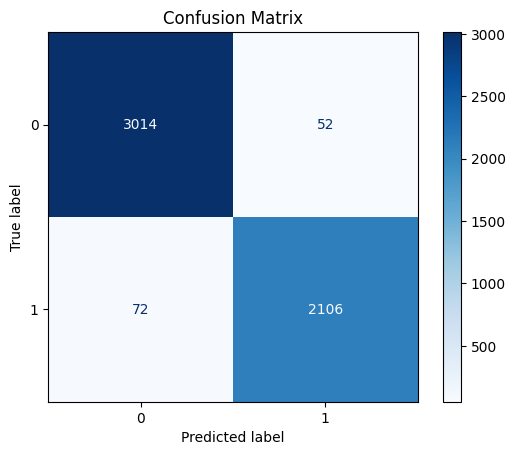

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

# Confusion Matrix Visual
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()




accuracy_score 0.9763539282990084
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.98      0.97      0.98      0.97      0.95      3066
          1       0.98      0.97      0.98      0.97      0.97      0.95      2178

avg / total       0.98      0.98      0.97      0.98      0.97      0.95      5244



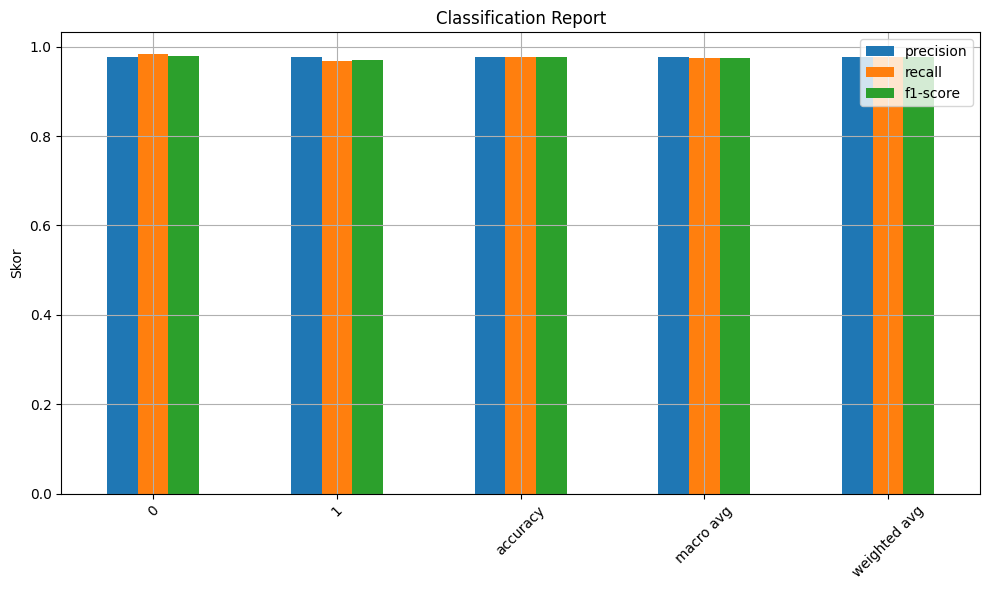

In [ ]:
# Evaluasi Kinerja
print(f"accuracy_score {accuracy_score(y_test, y_pred)}")
print(classification_report_imbalanced(y_test, y_pred))

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Hanya ambil precision, recall, f1-score
report_df = report_df[['precision', 'recall', 'f1-score']]

report_df.plot(kind='bar', figsize=(10,6))
plt.title("Classification Report")
plt.ylabel("Skor")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Import library yang dibutuhkan
import ipywidgets as widgets
from IPython.display import display, clear_output

# ==============================================================================
#           >> FITUR INPUTAN INTERAKTIF MENGGUNAKAN DROPDOWN <<
# ==============================================================================

# Ambil data asli untuk mendapatkan pilihan unik di setiap kolom
original_df = pd.read_csv(url, sep=';')

# Buat dictionary untuk menyimpan semua widget dropdown
input_widgets = {}

print("Silakan pilih karakteristik jamur di bawah ini:")

# Buat dropdown untuk setiap kolom fitur
for col in X.columns:
    # Ambil nilai unik dari kolom di data asli dan urutkan
    options = sorted(original_df[col].unique().tolist())
    # Buat widget dropdown
    input_widgets[col] = widgets.Dropdown(
        options=options,
        description=f'{col}:',
        disabled=False,
    )
    # Tampilkan widget
    display(input_widgets[col])

# Buat tombol untuk melakukan prediksi
button = widgets.Button(description="Prediksi Sekarang!")
output = widgets.Output()

def on_button_clicked(b):
    with output:
        clear_output() # Bersihkan output sebelumnya

        # Kumpulkan semua nilai dari dropdown
        user_input = {}
        for col, widget in input_widgets.items():
            user_input[col] = widget.value

        # Ubah input menjadi DataFrame
        input_df_raw = pd.DataFrame([user_input])
        input_df_encoded = pd.DataFrame()

        # Lakukan encoding pada input pengguna
        # Gunakan encoder yang sudah dilatih pada data asli
        for col in X.columns:
            le_temp = LabelEncoder().fit(original_df[col])
            # Menggunakan try-except untuk menangani nilai yang mungkin tidak ada
            try:
                input_df_encoded[col] = le_temp.transform(input_df_raw[col])
            except:
                print(f"Error saat encoding kolom {col}")
                return # Hentikan jika ada error

        # Lakukan prediksi
        prediction = model.predict(input_df_encoded)
        hasil = 'Bisa Dimakan (Edible)' if prediction[0] == 0 else 'Beracun (Poisonous)'

        # Tampilkan hasilnya
        print("\n🎉 **HASIL PREDIKSI** 🎉")
        print("------------------------------------------")
        print(f"Jamur dengan karakteristik yang Anda pilih diprediksi: **{hasil}**")
        print("------------------------------------------")


# Hubungkan fungsi dengan tombol
button.on_click(on_button_clicked)

# Tampilkan tombol dan area output
display(button, output)

Silakan pilih karakteristik jamur di bawah ini:


Dropdown(description='cap-shape:', options=('bell', 'conical', 'convex', 'flat', 'knobbed', 'sunken'), value='…

Dropdown(description='cap-surface:', options=('fibrous', 'groovesmooth', 'scaly', 'smooth'), value='fibrous')

Dropdown(description='cap-color:', options=('brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'purple', 'r…

Dropdown(description='bruises:', options=('bruises', 'no'), value='bruises')

Dropdown(description='gill-spacing:', options=('close', 'crowded'), value='close')

Dropdown(description='gill-size:', options=('broad', 'narrow'), value='broad')

Dropdown(description='gill-color:', options=('black', 'brown', 'buff', 'chocolate', 'gray', 'green', 'orange',…

Dropdown(description='stalk-shape:', options=('enlarging', 'tapering'), value='enlarging')

Dropdown(description='stalk-root:', options=('?', 'bulbous', 'club', 'equal', 'rooted'), value='?')

Dropdown(description='stalk-surface-above-ring:', options=('fibrous', 'scaly', 'silky', 'smooth'), value='fibr…

Dropdown(description='stalk-surface-below-ring:', options=('fibrous', 'scaly', 'silky', 'smooth'), value='fibr…

Dropdown(description='stalk-color-above-ring:', options=('brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink'…

Dropdown(description='stalk-color-below-ring:', options=('brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink'…

Dropdown(description='veil-color:', options=('brown', 'orange', 'white', 'yellow'), value='brown')

Dropdown(description='spore-print-color:', options=('black', 'brown', 'buff', 'chocolate', 'green', 'orange', …

Dropdown(description='population:', options=('abundant', 'clustered', 'numerous', 'scattered', 'several', 'sol…

Dropdown(description='habitat:', options=('grasses', 'leaves', 'meadows', 'paths', 'urban', 'waste', 'woods'),…

Button(description='Prediksi Sekarang!', style=ButtonStyle())

Output()

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.preprocessing import LabelEncoder

# URL dataset
url = "https://raw.githubusercontent.com/dataset-machine-learning/mushroom/refs/heads/main/mushroom.csv"

# ==============================================================================
#           >> FITUR INPUTAN INTERAKTIF MENGGUNAKAN DROPDOWN (LABEL INDONESIA) <<
# ==============================================================================

# Baca data asli
# Use the correct delimiter and let pandas infer headers
original_df = pd.read_csv(url, sep=';')


# Kolom fitur (gantilah sesuai dataset kamu)
columns = [
    'cap-shape', 'cap-surface', 'cap-color', 'bruises',
    'gill-color', 'stalk-shape', 'stalk-root',
    'stalk-color-above-ring', 'stalk-color-below-ring',
    'veil-color', 'population', 'habitat'
]


# Label kolom dalam Bahasa Indonesia
label_indonesia = {
    'cap-shape': 'Bentuk Tudung',
    'cap-surface': 'Permukaan Tudung',
    'cap-color': 'Warna Tudung',
    'bruises': 'Memar',
    'gill-color': 'Warna Bilah',
    'stalk-shape': 'Bentuk Batang',
    'stalk-root': 'Akar Batang',
    'stalk-color-above-ring': 'Warna Batang Atas Cincin',
    'stalk-color-below-ring': 'Warna Batang Bawah Cincin',
    'veil-color': 'Warna Selubung',
    'population': 'Populasi',
    'habitat': 'Habitat',
}

# Mapping nilai fitur ke Bahasa Indonesia
opsi_mapping = {
    'cap-shape': {'bell': 'Lonceng', 'conical': 'Kerucut', 'convex': 'Cembung', 'flat': 'Datar', 'knobbed': 'Tonjolan', 'sunken': 'Cekung'},
    'cap-surface': {'fibrous': 'Berserat', 'groovesmooth': 'Beralur', 'scaly': 'Bersisik', 'smooth': 'Halus'},
    'cap-color': {'brown': 'Coklat', 'buff': 'Coklat Kekuningan', 'cinnamon': 'Kayu Manis', 'gray': 'Abu-abu', 'green': 'Hijau', 'pink': 'Merah Muda', 'purple': 'Ungu', 'red': 'Merah', 'white': 'Putih', 'yellow': 'Kuning'},
    'bruises': {'bruises': 'Ya', 'no': 'Tidak'},
    'gill-color': {'black': 'Hitam', 'brown': 'Coklat', 'buff': 'Coklat Kekuningan', 'chocolate': 'Coklat Tua', 'gray': 'Abu-abu', 'green': 'Hijau', 'orange': 'Oranye', 'pink': 'Merah Muda', 'purple': 'Ungu', 'red': 'Merah', 'white': 'Putih', 'yellow': 'Kuning'},
    'stalk-shape': {'enlarging': 'Membesar', 'tapering': 'Mengecil'},
    'stalk-root': {'?': '?', 'bulbous': 'Menggelmbung', 'club': 'Tongkat', 'equal': 'Sama Besar', 'rooted': 'Berakar Kuat'},
    'stalk-color-above-ring': {'brown': 'Coklat', 'buff': 'Coklat Kekuningan', 'cinnamon': 'Kayu Manis', 'gray': 'Abu-abu', 'orange': 'Oranye', 'pink': 'Merah Muda', 'red': 'Merah', 'white': 'Putih', 'yellow': 'Kuning'}, # Added missing options
    'stalk-color-below-ring': {'brown': 'Coklat', 'buff': 'Coklat Kekuningan', 'cinnamon': 'Kayu Manis', 'gray': 'Abu-abu', 'orange': 'Oranye', 'pink': 'Merah Muda', 'red': 'Merah', 'white': 'Putih', 'yellow': 'Kuning'}, # Added missing options
    'veil-color': {'brown': 'Coklat', 'orange': 'Oranye', 'white': 'Putih', 'yellow': 'Kuning'},
    'population': {'abundant': 'Sangat Banyak', 'clustered': 'Bergerombol', 'numerous': 'Banyak', 'scattered': 'Tersebar', 'several': 'Beberapa', 'solitary': 'Sendirian'},
    'habitat': {'grasses': 'Rerumputan', 'leaves': 'Dedaunan', 'meadows': 'Padang Rumput', 'paths': 'Jalan Setapak', 'urban': 'Perkotaan', 'waste': 'Tempat Sampah', 'woods': 'Hutan'},
}

# Dictionary untuk widget dropdown
input_widgets = {}

print("Silakan pilih karakteristik jamur di bawah ini:")

# Buat dropdown berdasarkan kolom
for col in columns: # Iterate through the selected columns
    options = sorted(original_df[col].unique())
    if col in opsi_mapping:
        # Create mapped options, ensuring all original options have a mapping
        mapped_options = [(opsi_mapping[col].get(opt, opt), opt) for opt in options]
    else:
        mapped_options = [(opt, opt) for opt in options]

    input_widgets[col] = widgets.Dropdown(
        options=mapped_options,
        description=label_indonesia.get(col, col),
        disabled=False,
        layout=widgets.Layout(width='50%')
    )
    display(input_widgets[col])

# ==============================================================================
#           >> TOMBOL PREDIKSI <<
# ==============================================================================

button = widgets.Button(description="🔍 Prediksi Sekarang!")
output = widgets.Output()

# Asumsikan model sudah dimuat sebelumnya ke variabel `model`
def on_button_clicked(b):
    with output:
        clear_output()

        # Ambil nilai dari dropdown
        user_input = {}
        for col, widget in input_widgets.items():
            user_input[col] = widget.value

        # Ubah menjadi DataFrame
        input_df_raw = pd.DataFrame([user_input])
        input_df_encoded = pd.DataFrame()

        # Lakukan encoding
        for col in columns: # Iterate through the selected columns
            # Fit the encoder on the original data column to ensure all possible values are included
            le = LabelEncoder().fit(original_df[col])
            try:
                input_df_encoded[col] = le.transform(input_df_raw[col])
            except ValueError as e:
                print(f"⚠️ Error saat encoding kolom {col}: {e}")
                # If there's a value in user_input that wasn't in original_df
                print(f"Value causing error in {col}: {input_df_raw[col].iloc[0]}")
                return

        # Prediksi
        # Ensure the order of columns matches the training data (X)
        input_df_encoded = input_df_encoded[X.columns]

        prediction = model.predict(input_df_encoded)
        # Assuming the model output is 0 for edible and 1 for poisonous based on the original data
        hasil = '✅ **Bisa Dimakan (Edible)**' if prediction[0] == 0 else '⚠️ **Beracun (Poisonous)**'


        # Tampilkan hasil
        print("\n🎉 **HASIL PREDIKSI JAMUR** 🎉")
        print("------------------------------------------")
        print(f"Hasil prediksi berdasarkan input Anda: {hasil}")
        print("------------------------------------------")

# Tampilkan tombol dan output
button.on_click(on_button_clicked)
display(button, output)

Silakan pilih karakteristik jamur di bawah ini:


Dropdown(description='Bentuk Tudung', layout=Layout(width='50%'), options=(('Lonceng', 'bell'), ('Kerucut', 'c…

Dropdown(description='Permukaan Tudung', layout=Layout(width='50%'), options=(('Berserat', 'fibrous'), ('Beral…

Dropdown(description='Warna Tudung', layout=Layout(width='50%'), options=(('Coklat', 'brown'), ('Coklat Kekuni…

Dropdown(description='Memar', layout=Layout(width='50%'), options=(('Ya', 'bruises'), ('Tidak', 'no')), value=…

Dropdown(description='Warna Bilah', layout=Layout(width='50%'), options=(('Hitam', 'black'), ('Coklat', 'brown…

Dropdown(description='Bentuk Batang', layout=Layout(width='50%'), options=(('Membesar', 'enlarging'), ('Mengec…

Dropdown(description='Akar Batang', layout=Layout(width='50%'), options=(('?', '?'), ('Bulbus', 'bulbous'), ('…

Dropdown(description='Warna Batang Atas Cincin', layout=Layout(width='50%'), options=(('Coklat', 'brown'), ('C…

Dropdown(description='Warna Batang Bawah Cincin', layout=Layout(width='50%'), options=(('Coklat', 'brown'), ('…

Dropdown(description='Warna Selubung', layout=Layout(width='50%'), options=(('Coklat', 'brown'), ('Oranye', 'o…

Dropdown(description='Populasi', layout=Layout(width='50%'), options=(('Sangat Banyak', 'abundant'), ('Bergero…

Dropdown(description='Habitat', layout=Layout(width='50%'), options=(('Rerumputan', 'grasses'), ('Dedaunan', '…

Button(description='🔍 Prediksi Sekarang!', style=ButtonStyle())

Output()

Contoh Data Awal:
5 baris pertama:


,class,cap-shape,cap-surface,cap-color,bruises,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,close,narrow,black,enlarging,equal,smooth,smooth,white,white,white,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,close,broad,black,enlarging,club,smooth,smooth,white,white,white,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,close,broad,brown,enlarging,club,smooth,smooth,white,white,white,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,white,black,scattered,urban
4,edible,convex,smooth,gray,no,crowded,broad,black,tapering,equal,smooth,smooth,white,white,white,brown,abundant,grasses


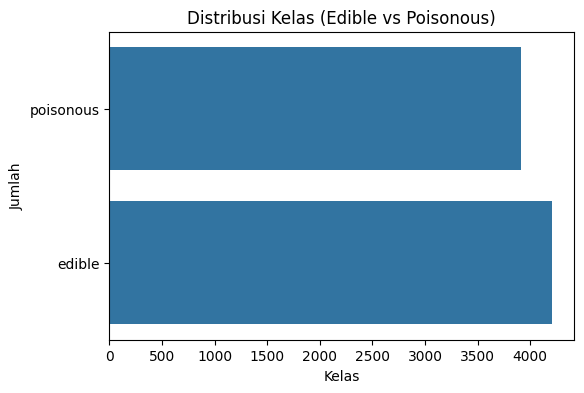

Jumlah data kosong tiap kolom:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
Jumlah data sebelum menghapus duplikat: 8124
Jumlah data setelah menghapus duplikat: 6554


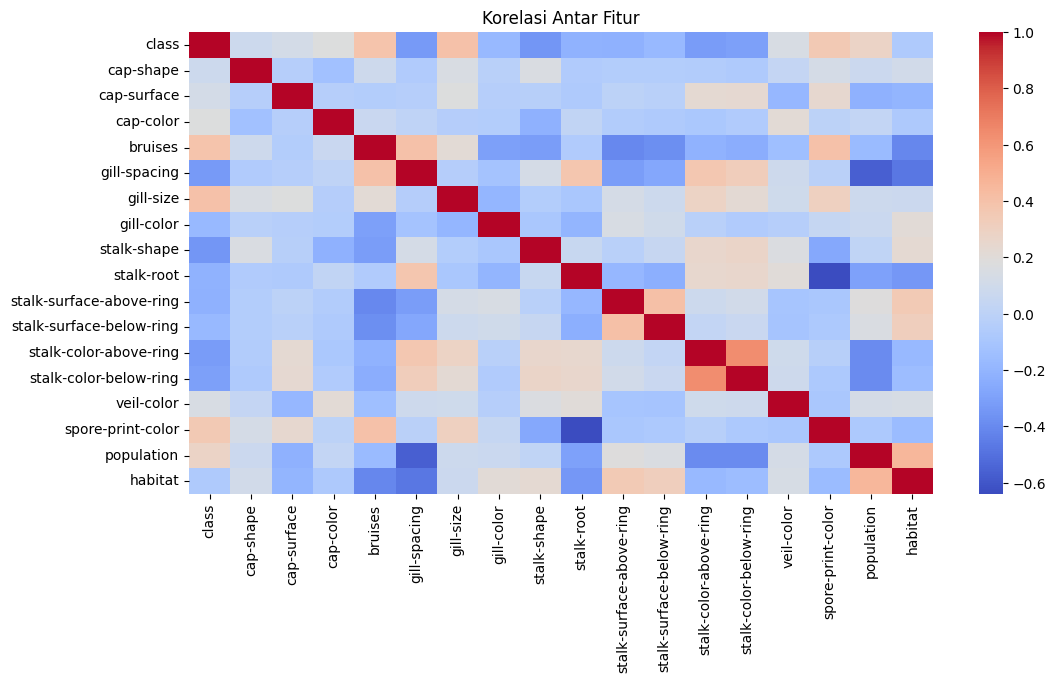

stalk-surface-above-ring    0.151440
spore-print-color           0.113685
gill-size                   0.111987
gill-spacing                0.110050
stalk-color-below-ring      0.104998
stalk-root                  0.075283
stalk-surface-below-ring    0.058075
population                  0.055902
habitat                     0.054377
bruises                     0.045207
stalk-color-above-ring      0.036352
stalk-shape                 0.033739
cap-surface                 0.019686
cap-shape                   0.013569
gill-color                  0.009849
cap-color                   0.005802
veil-color                  0.000000
dtype: float64


<Figure size 600x600 with 0 Axes>

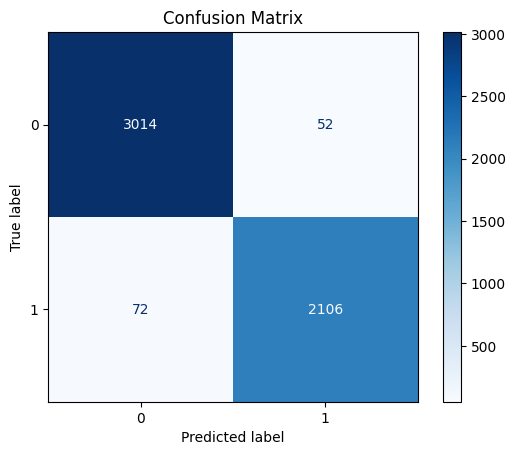

accuracy_score 0.9763539282990084
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.98      0.97      0.98      0.97      0.95      3066
          1       0.98      0.97      0.98      0.97      0.97      0.95      2178

avg / total       0.98      0.98      0.97      0.98      0.97      0.95      5244



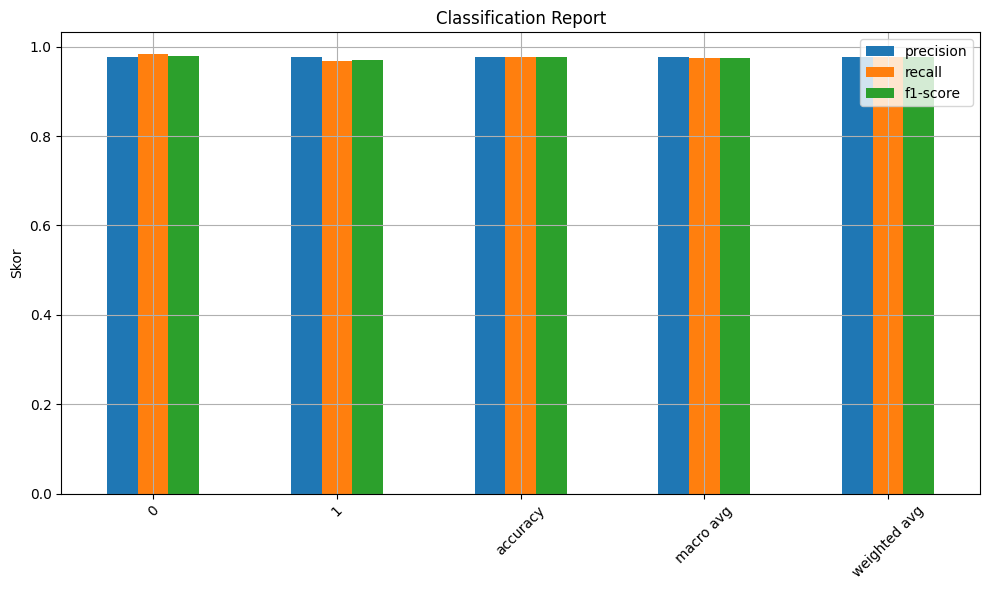

Silakan pilih karakteristik jamur di bawah ini:


Dropdown(description='cap-shape:', options=('bell', 'conical', 'convex', 'flat', 'knobbed', 'sunken'), value='…

Dropdown(description='cap-surface:', options=('fibrous', 'groovesmooth', 'scaly', 'smooth'), value='fibrous')

Dropdown(description='cap-color:', options=('brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'purple', 'r…

Dropdown(description='bruises:', options=('bruises', 'no'), value='bruises')

Dropdown(description='gill-spacing:', options=('close', 'crowded'), value='close')

Dropdown(description='gill-size:', options=('broad', 'narrow'), value='broad')

Dropdown(description='gill-color:', options=('black', 'brown', 'buff', 'chocolate', 'gray', 'green', 'orange',…

Dropdown(description='stalk-shape:', options=('enlarging', 'tapering'), value='enlarging')

Dropdown(description='stalk-root:', options=('?', 'bulbous', 'club', 'equal', 'rooted'), value='?')

Dropdown(description='stalk-surface-above-ring:', options=('fibrous', 'scaly', 'silky', 'smooth'), value='fibr…

Dropdown(description='stalk-surface-below-ring:', options=('fibrous', 'scaly', 'silky', 'smooth'), value='fibr…

Dropdown(description='stalk-color-above-ring:', options=('brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink'…

Dropdown(description='stalk-color-below-ring:', options=('brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink'…

Dropdown(description='veil-color:', options=('brown', 'orange', 'white', 'yellow'), value='brown')

Dropdown(description='spore-print-color:', options=('black', 'brown', 'buff', 'chocolate', 'green', 'orange', …

Dropdown(description='population:', options=('abundant', 'clustered', 'numerous', 'scattered', 'several', 'sol…

Dropdown(description='habitat:', options=('grasses', 'leaves', 'meadows', 'paths', 'urban', 'waste', 'woods'),…

Button(description='Prediksi Sekarang!', style=ButtonStyle())

Output()

Silakan pilih karakteristik jamur di bawah ini:


Dropdown(description='Bentuk Tudung', layout=Layout(width='50%'), options=(('Lonceng', 'bell'), ('Kerucut', 'c…

Dropdown(description='Permukaan Tudung', layout=Layout(width='50%'), options=(('Berserat', 'fibrous'), ('Beral…

Dropdown(description='Warna Tudung', layout=Layout(width='50%'), options=(('Coklat', 'brown'), ('Coklat Kekuni…

Dropdown(description='Memar', layout=Layout(width='50%'), options=(('Ya', 'bruises'), ('Tidak', 'no')), value=…

Dropdown(description='Warna Bilah', layout=Layout(width='50%'), options=(('Hitam', 'black'), ('Coklat', 'brown…

Dropdown(description='Bentuk Batang', layout=Layout(width='50%'), options=(('Membesar', 'enlarging'), ('Mengec…

Dropdown(description='Akar Batang', layout=Layout(width='50%'), options=(('?', '?'), ('Menggelmbung', 'bulbous…

Dropdown(description='Warna Batang Atas Cincin', layout=Layout(width='50%'), options=(('Coklat', 'brown'), ('C…

Dropdown(description='Warna Batang Bawah Cincin', layout=Layout(width='50%'), options=(('Coklat', 'brown'), ('…

Dropdown(description='Warna Selubung', layout=Layout(width='50%'), options=(('Coklat', 'brown'), ('Oranye', 'o…

Dropdown(description='Populasi', layout=Layout(width='50%'), options=(('Sangat Banyak', 'abundant'), ('Bergero…

Dropdown(description='Habitat', layout=Layout(width='50%'), options=(('Rerumputan', 'grasses'), ('Dedaunan', '…

Button(description='🔍 Prediksi Sekarang!', style=ButtonStyle())

Output()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# -*- coding: utf-8 -*-
"""RandomForest_Mushroom_2.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1cldpjwuYCytRcxNNwl7j7t60drde5QhQ
"""

# Import Library yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

"""Load Dataset"""

# Load Dataset dari URL
url = "https://raw.githubusercontent.com/dataset-machine-learning/mushroom/refs/heads/main/mushroom.csv"
data = pd.read_csv(url, sep=';')
print("Contoh Data Awal:")
data

# Visualisasi beberapa baris awal
print("5 baris pertama:")
display(data.head())

# Visualisasi distribusi target class
plt.figure(figsize=(6,4))
sns.countplot(data['class'])
plt.title("Distribusi Kelas (Edible vs Poisonous)")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.show()

"""TAHAP EDA / PREPROCESSING -- DATVIS"""

# MELIHAT ADA DATA KOSONG ATAU TIDAK
print("Jumlah data kosong tiap kolom:")
print(data.isnull().sum())

# MERUBAH HURUF MENJADI ANGKA
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

# SEBELUM DI HAPUS YANG DUPLIKAT
print(f"Jumlah data sebelum menghapus duplikat: {data.shape[0]}")

# MENGHAPUS DUPLIKAT
data.drop_duplicates(inplace=True)

# SETELAH DI HAPUS
print(f"Jumlah data setelah menghapus duplikat: {data.shape[0]}")

# HAPUS KOLOM YANG TERLALU BERPENGARUH
data.drop(columns=['gill-spacing', 'gill-size', 'stalk-surface-above-ring', 'stalk-surface-below-ring','spore-print-color'])

# MEMISAHKAN FITUR DAN TARGET (MENJADIKAN CLASS SEBAGAI TARGET)
X = data.drop(columns=['class'])
y = data['class']

data

# Visualisasi missing values jika ada
missing_values = data.isnull().sum()
if missing_values.any():
    missing_values = missing_values[missing_values > 0]
    missing_values.plot(kind='bar', figsize=(10,5), title='Jumlah Data Kosong per Kolom')
    plt.ylabel('Jumlah Kosong')
    plt.show()

# Visualisasi distribusi fitur setelah encoding
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title("Korelasi Antar Fitur")
plt.show()

pd.DataFrame(y).head()

# Membagi data menjadi data training dan data testing
# Data untuk testing 20%, data untuk training 80%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 42)

# Inisiasi Model

model = RandomForestClassifier(
    n_estimators=10, # Mengurangi jumlah estimator
    max_depth=4,  # Mengurangi kedalaman pohon
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# Training model dengan .fit()

model.fit(X, y)
importances = model.feature_importances_
important_features = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(important_features)

# Prediksi pada data test

y_pred = model.predict(X_test)
y_pred

y_test

# Memeriksa antara hasil prediksi dan data aktual

df = pd.DataFrame({'Prediksi': y_pred, 'Aktual': y_test})
df

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

# Confusion Matrix Visual
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Evaluasi Kinerja
print(f"accuracy_score {accuracy_score(y_test, y_pred)}")
print(classification_report_imbalanced(y_test, y_pred))

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Hanya ambil precision, recall, f1-score
report_df = report_df[['precision', 'recall', 'f1-score']]

report_df.plot(kind='bar', figsize=(10,6))
plt.title("Classification Report")
plt.ylabel("Skor")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Import library yang dibutuhkan
import ipywidgets as widgets
from IPython.display import display, clear_output

# ==============================================================================
#           >> FITUR INPUTAN INTERAKTIF MENGGUNAKAN DROPDOWN <<
# ==============================================================================

# Ambil data asli untuk mendapatkan pilihan unik di setiap kolom
original_df = pd.read_csv(url, sep=';')

# Buat dictionary untuk menyimpan semua widget dropdown
input_widgets = {}

print("Silakan pilih karakteristik jamur di bawah ini:")

# Buat dropdown untuk setiap kolom fitur
for col in X.columns:
    # Ambil nilai unik dari kolom di data asli dan urutkan
    options = sorted(original_df[col].unique().tolist())
    # Buat widget dropdown
    input_widgets[col] = widgets.Dropdown(
        options=options,
        description=f'{col}:',
        disabled=False,
    )
    # Tampilkan widget
    display(input_widgets[col])

# Buat tombol untuk melakukan prediksi
button = widgets.Button(description="Prediksi Sekarang!")
output = widgets.Output()

def on_button_clicked(b):
    with output:
        clear_output() # Bersihkan output sebelumnya

        # Kumpulkan semua nilai dari dropdown
        user_input = {}
        for col, widget in input_widgets.items():
            user_input[col] = widget.value

        # Ubah input menjadi DataFrame
        input_df_raw = pd.DataFrame([user_input])
        input_df_encoded = pd.DataFrame()

        # Lakukan encoding pada input pengguna
        # Gunakan encoder yang sudah dilatih pada data asli
        for col in X.columns:
            le_temp = LabelEncoder().fit(original_df[col])
            # Menggunakan try-except untuk menangani nilai yang mungkin tidak ada
            try:
                input_df_encoded[col] = le_temp.transform(input_df_raw[col])
            except:
                print(f"Error saat encoding kolom {col}")
                return # Hentikan jika ada error

        # Lakukan prediksi
        prediction = model.predict(input_df_encoded)
        hasil = 'Bisa Dimakan (Edible)' if prediction[0] == 0 else 'Beracun (Poisonous)'

        # Tampilkan hasilnya
        print("\n🎉 **HASIL PREDIKSI** 🎉")
        print("------------------------------------------")
        print(f"Jamur dengan karakteristik yang Anda pilih diprediksi: **{hasil}**")
        print("------------------------------------------")


# Hubungkan fungsi dengan tombol
button.on_click(on_button_clicked)

# Tampilkan tombol dan area output
display(button, output)

# Import library yang dibutuhkan
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.preprocessing import LabelEncoder

# URL dataset
url = "https://raw.githubusercontent.com/dataset-machine-learning/mushroom/refs/heads/main/mushroom.csv"

# ==============================================================================
#           >> FITUR INPUTAN INTERAKTIF MENGGUNAKAN DROPDOWN (LABEL INDONESIA) <<
# ==============================================================================

# Baca data asli
# Use the correct delimiter and let pandas infer headers
original_df = pd.read_csv(url, sep=';')


# Kolom fitur (gantilah sesuai dataset kamu)
columns = [
    'cap-shape', 'cap-surface', 'cap-color', 'bruises',
    'gill-color', 'stalk-shape', 'stalk-root',
    'stalk-color-above-ring', 'stalk-color-below-ring',
    'veil-color', 'population', 'habitat'
]


# Label kolom dalam Bahasa Indonesia
label_indonesia = {
    'cap-shape': 'Bentuk Tudung',
    'cap-surface': 'Permukaan Tudung',
    'cap-color': 'Warna Tudung',
    'bruises': 'Memar',
    'gill-color': 'Warna Bilah',
    'stalk-shape': 'Bentuk Batang',
    'stalk-root': 'Akar Batang',
    'stalk-color-above-ring': 'Warna Batang Atas Cincin',
    'stalk-color-below-ring': 'Warna Batang Bawah Cincin',
    'veil-color': 'Warna Selubung',
    'population': 'Populasi',
    'habitat': 'Habitat',
}

# Mapping nilai fitur ke Bahasa Indonesia
opsi_mapping = {
    'cap-shape': {'bell': 'Lonceng', 'conical': 'Kerucut', 'convex': 'Cembung', 'flat': 'Datar', 'knobbed': 'Tonjolan', 'sunken': 'Cekung'},
    'cap-surface': {'fibrous': 'Berserat', 'groovesmooth': 'Beralur', 'scaly': 'Bersisik', 'smooth': 'Halus'},
    'cap-color': {'brown': 'Coklat', 'buff': 'Coklat Kekuningan', 'cinnamon': 'Kayu Manis', 'gray': 'Abu-abu', 'green': 'Hijau', 'pink': 'Merah Muda', 'purple': 'Ungu', 'red': 'Merah', 'white': 'Putih', 'yellow': 'Kuning'},
    'bruises': {'bruises': 'Ya', 'no': 'Tidak'},
    'gill-color': {'black': 'Hitam', 'brown': 'Coklat', 'buff': 'Coklat Kekuningan', 'chocolate': 'Coklat Tua', 'gray': 'Abu-abu', 'green': 'Hijau', 'orange': 'Oranye', 'pink': 'Merah Muda', 'purple': 'Ungu', 'red': 'Merah', 'white': 'Putih', 'yellow': 'Kuning'},
    'stalk-shape': {'enlarging': 'Membesar', 'tapering': 'Mengecil'},
    'stalk-root': {'?': '?', 'bulbous': 'Menggelmbung', 'club': 'Tongkat', 'equal': 'Sama Besar', 'rooted': 'Berakar Kuat'},
    'stalk-color-above-ring': {'brown': 'Coklat', 'buff': 'Coklat Kekuningan', 'cinnamon': 'Kayu Manis', 'gray': 'Abu-abu', 'orange': 'Oranye', 'pink': 'Merah Muda', 'red': 'Merah', 'white': 'Putih', 'yellow': 'Kuning'}, # Added missing options
    'stalk-color-below-ring': {'brown': 'Coklat', 'buff': 'Coklat Kekuningan', 'cinnamon': 'Kayu Manis', 'gray': 'Abu-abu', 'orange': 'Oranye', 'pink': 'Merah Muda', 'red': 'Merah', 'white': 'Putih', 'yellow': 'Kuning'}, # Added missing options
    'veil-color': {'brown': 'Coklat', 'orange': 'Oranye', 'white': 'Putih', 'yellow': 'Kuning'},
    'population': {'abundant': 'Sangat Banyak', 'clustered': 'Bergerombol', 'numerous': 'Banyak', 'scattered': 'Tersebar', 'several': 'Beberapa', 'solitary': 'Sendirian'},
    'habitat': {'grasses': 'Rerumputan', 'leaves': 'Dedaunan', 'meadows': 'Padang Rumput', 'paths': 'Jalan Setapak', 'urban': 'Perkotaan', 'waste': 'Tempat Sampah', 'woods': 'Hutan'},
}

# Dictionary untuk widget dropdown
input_widgets = {}

print("Silakan pilih karakteristik jamur di bawah ini:")

# Buat dropdown berdasarkan kolom
for col in columns: # Iterate through the selected columns
    options = sorted(original_df[col].unique())
    if col in opsi_mapping:
        # Create mapped options, ensuring all original options have a mapping
        mapped_options = [(opsi_mapping[col].get(opt, opt), opt) for opt in options]
    else:
        mapped_options = [(opt, opt) for opt in options]

    input_widgets[col] = widgets.Dropdown(
        options=mapped_options,
        description=label_indonesia.get(col, col),
        disabled=False,
        layout=widgets.Layout(width='50%')
    )
    display(input_widgets[col])

# ==============================================================================
#           >> TOMBOL PREDIKSI <<
# ==============================================================================

button = widgets.Button(description="🔍 Prediksi Sekarang!")
output = widgets.Output()

# Asumsikan model sudah dimuat sebelumnya ke variabel `model`
def on_button_clicked(b):
    with output:
        clear_output()

        # Ambil nilai dari dropdown
        user_input = {}
        for col, widget in input_widgets.items():
            user_input[col] = widget.value

        # Ubah menjadi DataFrame
        input_df_raw = pd.DataFrame([user_input])
        input_df_encoded = pd.DataFrame()

        # Lakukan encoding
        for col in columns: # Iterate through the selected columns
            # Fit the encoder on the original data column to ensure all possible values are included
            le = LabelEncoder().fit(original_df[col])
            try:
                input_df_encoded[col] = le.transform(input_df_raw[col])
            except ValueError as e:
                print(f"⚠️ Error saat encoding kolom {col}: {e}")
                # If there's a value in user_input that wasn't in original_df
                print(f"Value causing error in {col}: {input_df_raw[col].iloc[0]}")
                return

        # Prediksi
        # Ensure the order of columns matches the training data (X)
        input_df_encoded = input_df_encoded[X.columns]

        prediction = model.predict(input_df_encoded)
        # Assuming the model output is 0 for edible and 1 for poisonous based on the original data
        hasil = '✅ **Bisa Dimakan (Edible)**' if prediction[0] == 0 else '⚠️ **Beracun (Poisonous)**'


        # Tampilkan hasil
        print("\n🎉 **HASIL PREDIKSI JAMUR** 🎉")
        print("------------------------------------------")
        print(f"Hasil prediksi berdasarkan input Anda: {hasil}")
        print("------------------------------------------")

# Tampilkan tombol dan output
button.on_click(on_button_clicked)
display(button, output)